In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [119]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [120]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [122]:
numeric_cols=df.select_dtypes(include='number').columns
cr=df[numeric_cols].corr()

<Axes: >

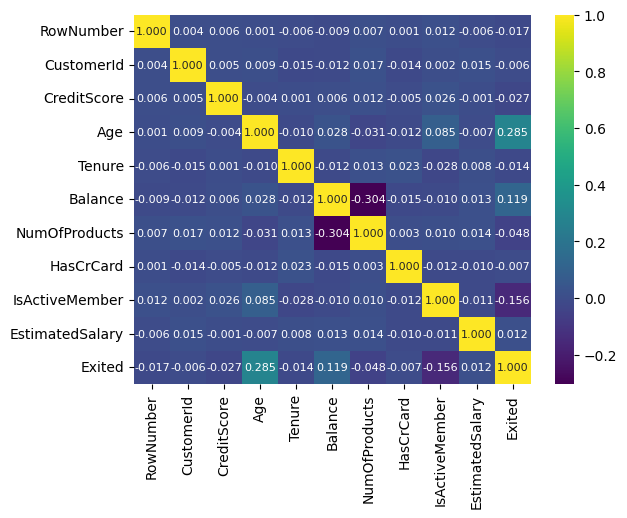

In [123]:

sns.heatmap(cr,annot=True,fmt='0.3f',cmap='viridis',annot_kws={"size": 8})

In [124]:
df.drop(columns=['Surname','RowNumber','CustomerId','Tenure','HasCrCard'],inplace=True)

In [125]:
df.info()
df_train=df.drop(columns=['Exited'])
numeric_cols=df_train.select_dtypes(include='number').columns #updated numeric_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [126]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [127]:
px.histogram(df,x='Geography',color='Exited',barmode='group', title='Churn Analysis by Geography')

In [128]:
px.histogram(df,x='Gender',color='Exited',barmode='group', title='Churn Analysis by Gender')

In [129]:
categorical_cols=df.select_dtypes(include='object').columns

In [130]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols=encoder.get_feature_names_out(categorical_cols).tolist()
df[encoded_cols]=encoder.transform(df[categorical_cols])

In [131]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,0.00,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,83807.86,1,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,159660.80,3,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,France,Female,39,0.00,2,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,Spain,Female,43,125510.82,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [132]:
df.drop(columns=categorical_cols,inplace=True)

In [133]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,0.00,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,83807.86,1,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,159660.80,3,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,0.00,2,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,125510.82,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [135]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Exited'),df['Exited'],test_size=0.2,random_state=42)

In [136]:
sc=MinMaxScaler().fit(df[numeric_cols])
x_train[numeric_cols]=sc.transform(x_train[numeric_cols])
x_test[numeric_cols]=sc.transform(x_test[numeric_cols])

In [137]:
x_train[numeric_cols].describe()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.603295,0.282402,0.303319,0.177125,0.512750,0.502147
std,0.192732,0.142148,0.248950,0.193235,0.499869,0.287622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000392
25%,0.470000,0.189189,0.000000,0.000000,0.000000,0.256787
50%,0.606000,0.256757,0.384409,0.000000,1.000000,0.502429
75%,0.738000,0.351351,0.508618,0.333333,1.000000,0.747993
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999891


In [149]:
rf=RandomForestClassifier(n_estimators=100,random_state=42).fit(x_train,y_train)

In [150]:
accuracy_score(y_train,rf.predict(x_train))

1.0

In [151]:
accuracy_score(y_test,rf.predict(x_test))

0.8595

In [154]:
print(classification_report(y_train,rf.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

